## Build KNN Class

In [1]:
# TODO: Buat class KNN yang akan Anda gunakan untuk classification dan regression
import numpy as np
from collections import Counter
from scipy.stats import mode

class KNN:
    def __init__(self, k=3, metric='euclidean', task='classification'):
        self.k = k
        self.metric = metric
        self.task = task
        self.X_train = None
        self.y_train = None

    def euclidean(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def manhattan(self, x1, x2):
        return np.sum(np.abs(x1 - x2))

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def get_neighbours(self, x):
        distances = []
        for _, x_train in self.X_train.iterrows():
            if self.metric == 'euclidean':
                distances.append(self.euclidean(x, x_train.values))
            elif self.metric == 'manhattan':
                distances.append(self.manhattan(x, x_train.values))
            else:
                raise NameError('Metric must be either "euclidean" or "manhattan"')
        neighbours_indices = np.argsort(distances)[:self.k]
        return self.X_train.iloc[neighbours_indices], self.y_train.iloc[neighbours_indices]

    def predict(self, X):
        predictions = []
        for _, x in X.iterrows():
            _, neighbour_labels = self.get_neighbours(x.values)
            if self.task == 'classification':
                mode_result = mode(neighbour_labels)
                mode_values = np.atleast_1d(mode_result.mode)
                prediction = mode_values[0]
                predictions.append(prediction)
            elif self.task == 'regression':
                predictions.append(np.mean(neighbour_labels))
            else:
                raise ValueError('Task harus berupa classification atau regression')
        return np.array(predictions)

    def score(self, X_test, y_test):
        y_pred = self.predict(X_test)
        if self.task == 'classification':
            accuracy = np.sum(y_pred == y_test) / len(y_test)
            return accuracy
        elif self.task == 'regression':
            u = ((y_test - y_pred) ** 2).sum()
            v = ((y_test - y_test.mean()) ** 2).sum()
            r2_score = 1 - u / v
            return r2_score
        else:
            raise ValueError('Task must be either "classification" or "regression"')

    def get_params(self, deep=True):
        return {'k': self.k, 'metric': self.metric, 'task': self.task}

    def set_params(self, **parameters):
        for parameter, value in parameters.items():
            setattr(self, parameter, value)
        return self

# Classification

In [ ]:
# TODO: Gunakan class KNN yang Anda buat untuk menentukan class dari kerang Abalone
import pandas as pd

df_classification = pd.read_csv('dataset.csv')
df_classification.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Class
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,0
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0


### Preprocessing

In [ ]:
# TODO: Lakukan preprocessing
print(df_classification.isnull().sum())

Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Class             0
dtype: int64


### Feature selection dan split data

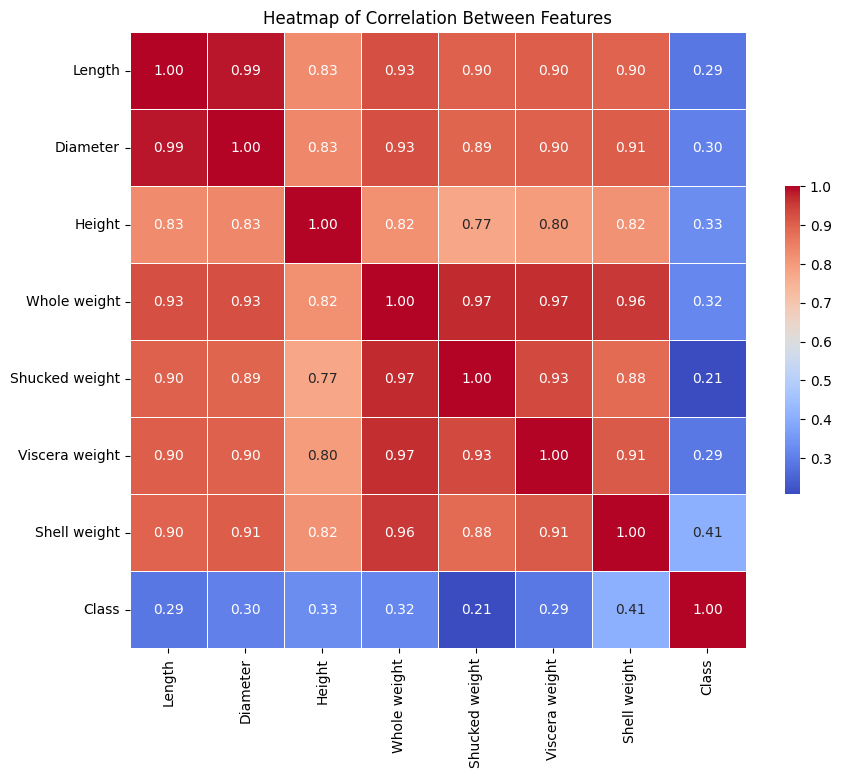

In [ ]:
# TODO: Lakukan pemilihan atribut dan split data menjadi train dan test
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df_classification.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Heatmap of Correlation Between Features')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X = df_classification[['Length', 'Height', 'Shucked weight']]
y = df_classification['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3341, 3), (3341,), (836, 3), (836,))

### Train dan test model

In [ ]:
# TODO: Lakukan training dan testing pada model KNN
knn_classification = KNN(task='classification')
knn_classification.fit(X_train, y_train)

In [ ]:
y_pred = knn_classification.predict(X_test)
y_pred

array([1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

### Hyperparameter tuning

In [ ]:
# TODO: Lakukan hyperparameter tuning pada model KNN
from sklearn.model_selection import cross_val_score

k_values = [3, 10]
metric_options = ['euclidean', 'manhattan']

best_score = 0
best_params = {'k': None, 'metric': None}

for k in k_values:
    for metric in metric_options:
        knn = KNN(k=k, metric=metric, task='classification')
        knn.fit(X_train, y_train)

        scores = cross_val_score(knn, X_train, y_train, cv=5)
        mean_score = scores.mean()

        if mean_score > best_score:
            best_score = mean_score
            best_params['k'] = k
            best_params['metric'] = metric

print(f"Best Score: {best_score}")
print(f"Best Parameters: k = {best_params['k']}, metric = {best_params['metric']}")

Best Score: 0.006884884938642893
Best Parameters: k = 3, metric = manhattan


# Regression

In [3]:
# TODO: Gunakan class KNN yang Anda buat untuk menentukan Whole weight dari kerang Abalone
import pandas as pd

df_regression = pd.read_csv('dataset.csv')
df_regression.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Class
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,0
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,0
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,0


### Preprocessing

In [4]:
# TODO: Lakukan preprocessing
print(df_regression.isnull().sum())

Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Class             0
dtype: int64


### Split data

In [5]:
# TODO: Lakukan split data menjadi train dan test
from sklearn.model_selection import train_test_split

X = df_regression[['Length', 'Height', 'Shucked weight']]
y = df_regression['Whole weight']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3341, 3), (3341,), (836, 3), (836,))

### Train dan test model

In [6]:
# TODO: Lakukan training dan testing pada model KNN
knn_regression = KNN(task='regression')
knn_regression.fit(X_train, y_train)

In [ ]:
y_pred = knn_regression.predict(X_test)
y_pred

array([1.09133333, 0.98283333, 0.87983333, 1.201     , 0.58633333,
       0.50966667, 0.657     , 0.62533333, 0.2115    , 1.0945    ,
       0.85016667, 0.19633333, 0.5225    , 0.23833333, 0.6065    ,
       0.88166667, 0.87883333, 0.70233333, 1.6855    , 0.644     ,
       1.84183333, 1.85316667, 1.259     , 1.17416667, 0.98533333,
       0.47633333, 0.69583333, 0.6975    , 0.99616667, 0.7805    ,
       1.09333333, 1.1755    , 0.20133333, 0.60533333, 0.5055    ,
       1.06183333, 0.14083333, 0.01883333, 0.5105    , 0.1775    ,
       2.02883333, 1.68166667, 1.03983333, 0.6765    , 0.8645    ,
       1.87733333, 0.99733333, 0.83733333, 0.6225    , 0.02933333,
       0.18566667, 1.32133333, 0.49083333, 0.026     , 0.327     ,
       0.82316667, 1.16783333, 1.263     , 0.8315    , 0.18666667,
       1.26983333, 1.37766667, 0.96683333, 0.30066667, 0.47966667,
       1.27433333, 0.05483333, 0.18766667, 0.57333333, 0.70966667,
       1.42833333, 0.686     , 0.30433333, 0.48483333, 0.29433

### Hyperparameter tuning

In [7]:
# TODO: Lakukan hyperparameter tuning pada model KNN
from sklearn.model_selection import cross_val_score

k_values = [3, 10]
metric_options = ['euclidean', 'manhattan']

best_score = 0
best_params = {'k': None, 'metric': None}

for k in k_values:
    for metric in metric_options:
        knn = KNN(k=k, metric=metric, task='regression')
        knn.fit(X_train, y_train)

        scores = cross_val_score(knn, X_train, y_train, cv=5)
        mean_score = scores.mean()

        if mean_score > best_score:
            best_score = mean_score
            best_params['k'] = k
            best_params['metric'] = metric

print(f"Best Score: {best_score}")
print(f"Best Parameters: k = {best_params['k']}, metric = {best_params['metric']}")

Best Score: 0.9707255118621537
Best Parameters: k = 10, metric = manhattan


# Pertanyaan

1. Apa saja pertimbangan yang harus diperhatikan dalam menentukan nilai k?
> Dalam menentukan nilai k untuk algoritma k-Nearest Neighbors (kNN), pertimbangan utama meliputi menemukan keseimbangan yang tepat dalam bias-variance tradeoff. Nilai k yang kecil cenderung membuat model terlalu peka terhadap data pelatihan, meningkatkan risiko overfitting dengan variance tinggi dan bias rendah. Sebaliknya, nilai k yang besar dapat menyebabkan model terlalu menggeneralisasi, mengakibatkan underfitting dengan bias tinggi dan variance rendah. Ukuran dataset juga mempengaruhi pilihan nilai k; dataset yang lebih besar mungkin memerlukan nilai k yang lebih besar untuk menghaluskan pengaruh noise, sedangkan dataset yang lebih kecil mungkin lebih cocok dengan nilai k yang lebih kecil untuk menangkap detail yang lebih halus.

2. Untuk Classification dan Regression, bagaimana hasil percobaan antara menggunakan euclidean distance dan manhattan distance untuk nilai k yang sama? Apa yang menyebabkan hal tersebut terjadi?
> Dalam k-Nearest Neighbors (kNN), pemilihan antara Euclidean distance dan Manhattan distance dapat mempengaruhi kinerja model baik dalam tugas klasifikasi maupun regresi, meskipun nilai k tetap sama. Euclidean distance, yang mengukur jarak terpendek antara dua titik, cenderung lebih sensitif terhadap perubahan yang lebih besar dalam satu dimensi dan sering digunakan dalam ruang dengan dimensi lebih rendah. Sebaliknya, Manhattan distance, yang mengukur jumlah perbedaan absolut antara koordinat dua titik, lebih efektif dalam ruang berdimensi tinggi atau dalam data yang mengandung outlier, karena kurang dipengaruhi oleh perubahan ekstrem dalam satu dimensi. Perbedaan ini terjadi karena Euclidean distance mengkuadratkan selisih antara koordinat, yang memperbesar pengaruh perbedaan besar, sedangkan Manhattan distance menangani setiap dimensi secara independen, membuatnya lebih tangguh terhadap outlier. Oleh karena itu, pemilihan metrik jarak bergantung pada sifat data dan dimensi ruang fitur, dengan hasil percobaan yang berpotensi berbeda tergantung pada karakteristik dataset dan konteks masalah.

3. Untuk Classification dan Regression, berdasarkan hasil hyperparameter tuning, apa rumus jarak dan nilai k yang paling optimal? Apa performance metrics yang Anda gunakan? Jelaskan dengan menyertakan alasannya
> Setelah melakukan hyperparameter tuning dengan mencoba menggunakan nilai k besar dan kecil, serta mencoba metric jarak yang digunakan, diperoleh hasil sebagai berikut.
> - Untuk task classification, hyperparameter terbaik adalah dengan k = 3 dan Manhattan Distance sebagai metric jarak.
> - Untuk task regression, hyperparameter terbaik adalah dengan k = 10 dan Manhattan Distance sebagai metric jarak.

4. Untuk Classification, apa variabel yang Anda pilih untuk memprediksi Class dari kerang Abalone? Jelaskan mengapa Anda memilih variabel tersebut
> Fitur yang digunakan untuk classification adalah `Length`, `Width`, dan `Shucked weight`. Hal tersebut dikarenakan fitur `Diameter` sangat berkorelasi dengan fitur `Length`. Selain itu, fitur `Whole weight`, `Shucked weight`, `Viscera weight`, dan `Shell weight` sangat berkorelasi satu sama lain. Oleh karena itu, `Shucked weight` dipilih untuk merepresentasikan bobot dari suatu kerang Abalone.

5. Apa pertimbangan dalam memilih kNN dibandingkan dengan metode classification dan regression lainnya? Jelaskan juga pada saat kondisi apa metode classification dan regression dapat bekerja dengan lebih baik
> K-Nearest Neighbors (kNN) dipilih atas metode klasifikasi dan regresi lainnya karena keunggulannya dalam kesederhanaan, efektivitas pada dataset dengan jumlah fitur yang tidak terlalu besar, dan tidak memerlukan asumsi statistik tentang distribusi data, yang membuatnya baik untuk non-linear data. Namun, kNN bisa kurang efisien pada dataset berdimensi tinggi karena 'curse of dimensionality' dan lebih lambat dalam prediksi karena perlu menghitung jarak dari titik data baru ke semua titik data pelatihan. Metode klasifikasi dan regresi lain seperti SVM atau random forests mungkin lebih baik ketika ada interaksi kompleks dan non-linear antar fitur atau ketika model perlu skalabel untuk dataset besar. Regresi linier dan logistik bekerja dengan baik ketika hubungan antara fitur dan target dapat dimodelkan secara linier dan asumsi statistik terpenuhi. Pada akhirnya, pemilihan metode bergantung pada ukuran dataset, kompleksitas hubungan dalam data, kebutuhan akan interpretasi model, dan keterbatasan komputasi.

6. Apa yang Anda ketahui tentang weighted k-NN?
> Weighted k-Nearest Neighbors (weighted kNN) merupakan variasi dari algoritma kNN standar, di mana bobot diberikan kepada kontribusi tetangga terdekat berdasarkan jarak mereka dari titik query. Dalam weighted kNN, tetangga yang lebih dekat memiliki pengaruh yang lebih besar dalam prediksi dibandingkan dengan tetangga yang lebih jauh. Ini bertujuan untuk mengatasi kelemahan kNN standar di mana semua tetangga dalam jumlah k terdekat dianggap memberikan kontribusi yang sama, tanpa memandang seberapa jauh mereka dari titik yang sedang diprediksi. Weighted kNN bisa lebih efektif di mana ada variasi kepadatan dalam ruang fitur atau ketika outlier mungkin hadir, karena memungkinkan model untuk memberi lebih sedikit bobot pada outlier atau titik yang jarang terjadi yang mungkin kurang representatif. Bobot dapat ditentukan dengan berbagai cara, tetapi yang paling umum adalah melalui fungsi seperti invers jarak atau fungsi kernel lainnya yang menurun dengan meningkatnya jarak.